<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/ODE_IVP_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examples for Ordinary Differential Equations (Initial Value Problem)
===============================================

## Part 2

### Suggestion

Run the code cell below before the others to make sure that scipy is up to date and the figures render well.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20
#!pip3 install --upgrade scipy

**Simulation of Non-Linear Dynamics Problems:**

### The Problem: The Van der Pol Oscillator
Van der Pol’s differential equation is

\begin{equation}
\frac{d^2x}{dt^2} - \mu\left(1-x^2\right)\frac{dx}{dt} + x = 0.
\end{equation}

The equation describes a system with nonlinear damping, the degree of nonlinearity given by $\mu$. If $\mu=0$, the system is linear and undamped, but as $\mu$ increases, so does the strength of the nonlinearity. 

Plot the phase portrait for the solution to Van der Pol’s equation in Python using SciPy’s ODE solver 'ivp_solve'.
We can recast the equation above in terms of the phase space point $y = \left[y_0, y_1\right] = \left[x, \dot{x}\right]$, yielding

\begin{align*}
\dot{y}_0 &= y_1\\
\dot{y}_1 &=  \mu\left(1-y^2_0\right) y_1 - y_0
\end{align*}

If $\mu=0$, we have a simple harmonic oscillator and the phase portrait is simply a circle. For larger values of $\mu$, the solutions enter limit cycles, but the cycles are more complicated than just circles. These lcycles are periodic attractors: every non-trivial solution converges to the limit cycle.

The code cell below yields the phase space plot.

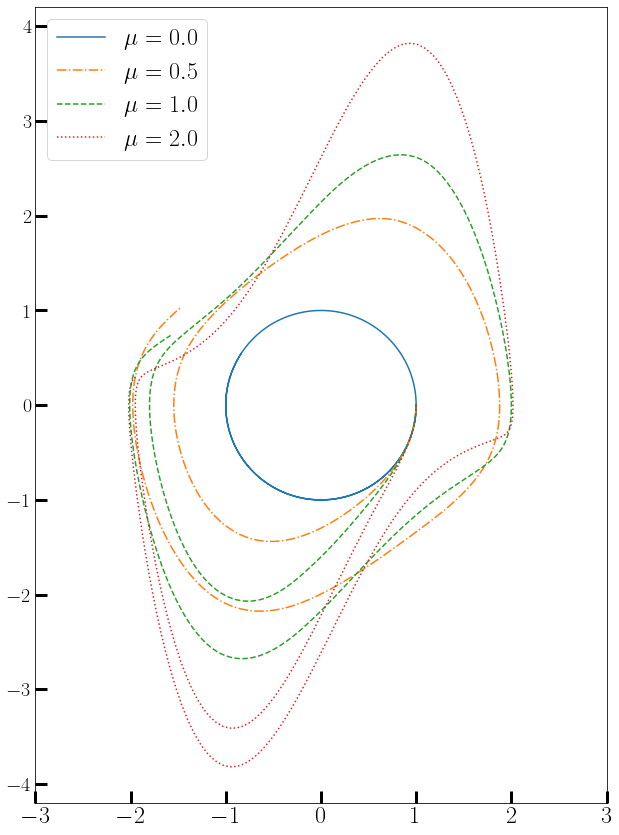

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,12)

def vdp(t, z):
    y0, y1 = z
    return [y1, mu*(1 - y0**2)*y1 - y0]

a, b = 0, 10

mus = [0, 0.5, 1, 2]
styles = ["-", "-.", "--", ":"]
t = np.linspace(a, b, 500)

for mu, style in zip(mus, styles):
    sol = solve_ivp(vdp, [a, b], [1, 0], t_eval=t)
    plt.plot(sol.y[0], sol.y[1], linestyle=style, label=f"$\mu={mu:1.1f}$")
  
# make a little extra horizontal room for legend
plt.xlim([-3,3])    
plt.legend()
plt.show()

### The Problem: Limit Cycles in the Van der Pol Oscillator

A couple questions come to mind. First, how quickly do the solutions become periodic? Second, how does the period depend on $\mu$? To address these questions, we’ll use an optional argument to ivp_solve we have not used before.

For 'ivp_solve', an *event* is a function of the time $t$ and the solution $y$ whose roots the solver will report. To determine the period, we’ll look at where the solution is zero; our event function is trivial since we want to find the roots of the solution itself.

Since we have cast our second order ODE as a pair of first order ODEs, our solution is a vector, the function $x$ and its derivative. So to find roots of the solution, we look at what the solver sees as the first component of the solver. So, our 'event' function can simply be:

In [3]:
def root(t, y): return y[0]

Let’s set $\mu = 3$ and find the zeros of the solution over the interval $[0, 40]$, starting from the initial condition $x(0) = 1, \dot{x}(0) = 0$.

In [10]:
mu = 3.0
sol = solve_ivp(vdp, [0, 200], [1, 0], events=root)
zeros = sol.t_events[0]
print(zeros)

[  1.16819163   5.45030383   9.88435185  14.30820792  18.73407972
  23.15519097  27.57615798  32.00589638  36.43105194  40.85574269
  45.27637676  49.6966933   54.12404707  58.54373953  62.96568472
  67.39155644  71.81002094  76.23198948  80.65930368  85.08110185
  89.51454708  93.9396593   98.36440771 102.78496411 107.20519656
 111.6320431  116.0555633  120.47750032 124.90043399 129.32512434
 133.74576728 138.16609382 142.59350147 147.01285115 151.43469136
 155.86074669 160.27955866 164.69707902 169.11797201 173.54817078
 177.97086704 182.38774633 186.80843657 191.23631017 195.65710548]


To estimate the period of the limit cycle we look at the spacing between zeros, and how that spacing is changing. Finally, if we plot the deltas we see that the zero spacings quickly approach a constant value. Zero crossings are half periods, so the period of the limit cycle is twice the limiting spacing between zeros.

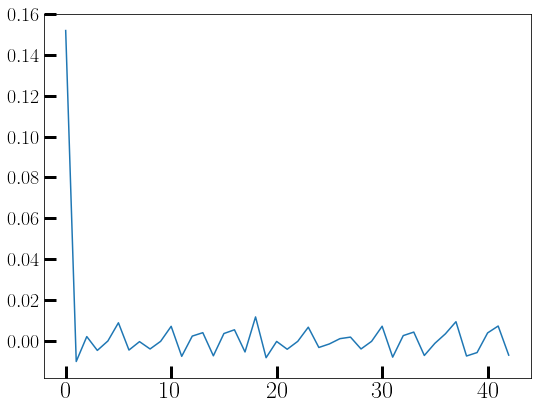

Time period of cycle for mu = 3.0 is 8.84


In [9]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)

mu = 3.0

sol = solve_ivp(vdp, [0, 200], [1, 0], events=root)
zeros = sol.t_events[0]
spacing = zeros[1:] - zeros[:-1]
deltas = spacing[1:] - spacing[:-1]
plt.plot(deltas)
plt.show()
print(f"Time period of cycle for mu = {mu:2.1f} is {2 * spacing[-1]:2.2f}")

### Homework

As homework, the student is encouraged to determine the following numerically:

* Formulate and execute a Python program for estimating the period of the limit cycle of a Van der Pol oscillator for a given value of $\mu$. Plot the period as a function of $\mu$

* Run this program for small $\mu$ and large $\mu\sim 100$. The method described above should fail for large $\mu$. Plot $x$ vs $t$ for large $\mu$ and explain why it fails.

* Consider the previous Van der Pol oscillator problem, but now with a drive $F(t) = \cos{\left(2\pi t/T\right)}$. Plot the phase space for $T=10$ and $\mu=9$. Explain the changes that take place as you vary $\mu$ keeping $T$ fixed.

### The Problem: The Lorenz Attractor

The Lorenz system of coupled, ordinary, first-order differential equations have chaotic solutions for certain parameter values $\sigma, \rho$ and $\beta$ and initial conditions, $u(0), v(0)$ and $w(0)$. Note that this system is *dissipative*.

\begin{aligned}
\frac{\mathrm{d} u}{\mathrm{~d} t} &=\sigma(v-u) \\
\frac{\mathrm{d} v}{\mathrm{~d} t} &=\rho u-v-u w \\
\frac{\mathrm{d} w}{\mathrm{~d} t} &=u v-\beta w
\end{aligned}

The following program plots the Lorenz attractor (the values of $x, y$ and $z$ as a parametric function of time) on a Matplotlib 3D projection.

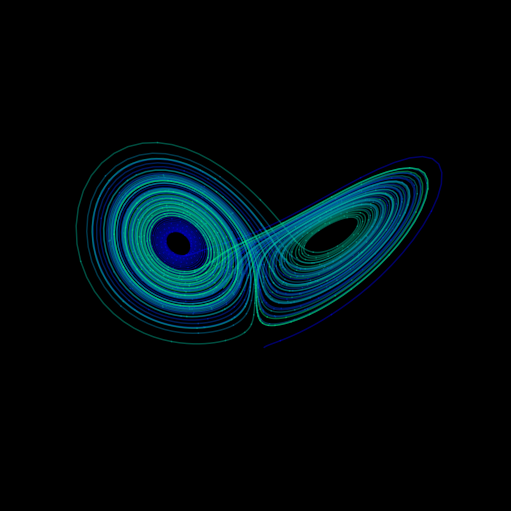

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 1, 1, 1

# Maximum time point and total number of time points.
tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Comment all below for animation
# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
cmap = plt.cm.winter
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.show()

### Homework

Play with the parameters of the Lorentz system in the code cell above and verify the following facts

* If $\rho <1$, then there is only one equilibrium point, which is at the origin. All orbits converge to the origin, which is a global attractor.

* A pitchfork bifurcation occurs at $\rho = 1$, and for $\rho > 1$, two additional critical points appear at $\left( \sqrt{\beta(\rho-1)}, \sqrt{\beta(\rho-1)}, \rho-1 \right)$ and $\left( -\sqrt{\beta(\rho-1)}, -\sqrt{\beta(\rho-1)}, \rho-1 \right)$ 
These correspond to steady convection. This pair of equilibrium points is stable only if the following criterion is met

\begin{equation*}
\rho < \sigma\frac{\sigma+\beta+3}{\sigma-\beta-1},\;\sigma > \beta+1
\end{equation*}

* At the critical value, both equilibrium points lose stability through a subcritical Hopf bifurcation.

As a solved example, we can see the onset of chaos in the Lorenz system by the sensitive dependence on initial conditions. The code cell below plots the same Lorenz system for two initial conditions that are only different by $2$ in $x$. The two trajectories are plotted in different colours. Initially, both trajectories nearly overlap. However, after some time, the two trajectories are easily distinguishable by two different colours that can be found in vastly separated regions.


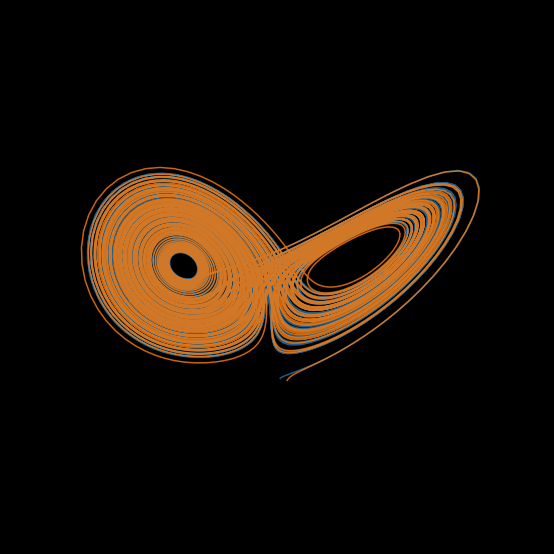

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions, apart from the one we're iterating.
sigma, beta, rho = 10, 2.667, 28
v0, w0 = 1, 1

# Maximum time point and total number of time points.
tmax, n = 100, 10000

fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

us = [1, 2]
for i,u0 in enumerate(us):
  # Integrate the Lorenz equations.
  soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                   dense_output=True)
  # Interpolate solution onto the time grid, t.
  t = np.linspace(0, tmax, n)
  x, y, z = soln.sol(t)
  ax.plot(x,y,z, alpha=0.8)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.show()

### The Problem: The Henon-Heiles System

The Henon-Heiles system is a paradigmatic example of *Hamiltonian Chaos*, where chaos can occur in a completely conserved dynamical system. The system arises from the motion of stars around a galactic center, assuming the motion is restricted to the $xy$ plane.

The Hamiltonian is given for a two-dimensional dynamical system as

\begin{equation*}
H = \frac12 (p_x^2 + p_y^2) + \frac12(x^2 + y^2) +  \left(x^2y - \frac{y^3}{3}\right)
\end{equation*}

Thus, the ordinary differential equations that describe the dynamical evolution can be obtained from hamilton's equations of motion, yielding

\begin{align*}
\dot{x} &= p_x, \\
\dot{p}_x &= -x - 2 xy, \\
\dot{y} &= p_y, \\
\dot{p}_y &= -y - \left(x^2 - y^2\right).
\end{align*}

Let us define $u = [u_0, u_1, u_2, u_3] = [x,p_x,y,p_y]$. The only parameter of interest is the total energy $E$, for which a large number of initial conditions can be chosen, all of which satisfy
\begin{equation*}
E = \frac12 (u^2_1 + u^2_3) + \frac12(u^2_0 + u^2_2) +  \left(u^2_0u_2 - \frac{u^3_2}{3}\right)
\end{equation*}

While the dynamics can be readily simulated with the tools at our disposal, it cannot be plotted completely, as the phase space is $4-$dimensional. However, we can look at *Poincare Sections*, $2-$d cross-sections of the phase space obtained by strobing the trajectories at the times when they pass through the surface. Let us look for values of $(y, p_y)$, or $(u_2, u_3)$ whenever $u_0=0$ and $u_1>0$ during the evolution of every trajectory. Note that, since the energy is always supposed to be conserved, fixing $u_2, u_3$ and $u_0$ automatically yields only two solutions for $u_1$ from the energy equation above, and we can choose either one. We have chosen the positive ones, given by the following equation on the $u_0=0$ hypersurface.
\begin{equation*}
u_1 = \sqrt{2E - u^2_2\left(1-\frac{2}{3}u_2\right)-u^2_3}.
\end{equation*}

The code cell below plots Poincare Sections for trajectories for any energy. The following energies are suggested. 

| E =	| 1/50 	| 1/23 	| 1/15 	| 1/8 	| 1/6 	|
|---	|---	|---	|---	|---	|---	|

For each energy, a numpy mgrid of initial conditions are created and the dynamics evolved using the 'solve_ivp' routine, and the only times of interest are when $u_0=0$, which is encapsulated into an event function. The highest energies will cause transitions to chaos.

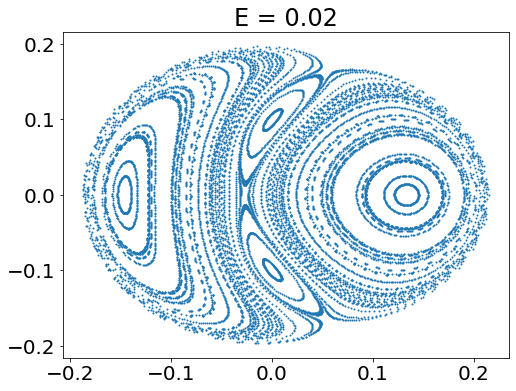

CPU times: user 1min 54s, sys: 139 ms, total: 1min 54s
Wall time: 1min 54s


In [11]:
%%time
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

def henon_system(t, u): # right-hand side of a system of ODEs
    x = u[0]
    px = u[1]
    y  = u[2]
    py = u[3]
    return np.array([px, -x-2*x*y, py, -y-x**2+y**2])

def poincare(f, X0, epoch_n, h=0.001, N=10):
    t = h*N*epoch_n
    X = []
    for state0 in X0:
        u1, u2, u3 = state0
        sol = solve_ivp(f, [0, t], [0, u1, u2, u3], max_step=0.1, events=lambda t,u:u[0])
        X.append(sol.y_events[0])
    return X

def give_ics(En, min, max,npts):
  """
  Returns a grid of initial conditions, recast as an iterable object 'ics'
  """
  u2m, u2mx = min, max
  u3m, u3mx = min, max
  U2, U3 = np.meshgrid(np.linspace(u2m, u2mx, npts), np.linspace(u3m, u3mx, npts))
  u2, u3 = U2.ravel(), U3.ravel()
  u1 = np.sqrt(2 * En - u2**2  * (1 - (2/3) * u2) - u3**2)
  U1 = u1.reshape(U2.shape)
  ics = np.vstack([U1.ravel(), U2.ravel(), U3.ravel()]).T
  ics = ics[~np.isnan(ics).any(axis=1)] # Remove all points that lie outside the energy hypersurface
  return ics

if __name__ == "__main__":
  energy = 1.0/50.0
  X0_henon = give_ics(energy, -1.5, 0.0, 50)
  data = poincare(henon_system, X0_henon, epoch_n=10000, h=0.1, N=1)
  data =np.array(np.concatenate(data).ravel())
  u2 = data[2::4]
  u3 = data[3::4]
  plt.title(f"E = {energy:1.2f}")
  plt.scatter(u2, u3, s=1)
  plt.show()

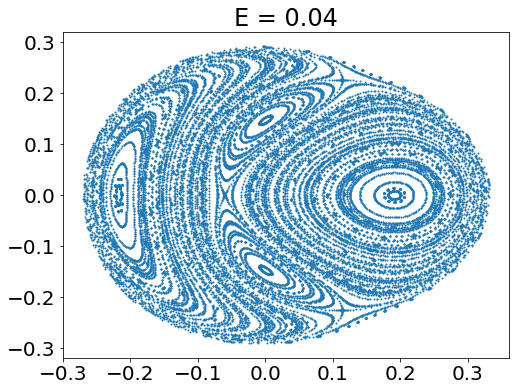

CPU times: user 3min 20s, sys: 100 ms, total: 3min 20s
Wall time: 3min 20s


In [12]:
%%time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

energy = 1.0/23.0
X0_henon = give_ics(energy, -1.5, 0.0, 50)
data = poincare(henon_system, X0_henon, epoch_n=10000, h=0.1, N=1)
data = np.array(np.concatenate(data).ravel())
u2 = data[2::4]
u3 = data[3::4]
plt.title(f"E = {energy:1.2f}")
plt.scatter(u2, u3, s=1)
plt.show()

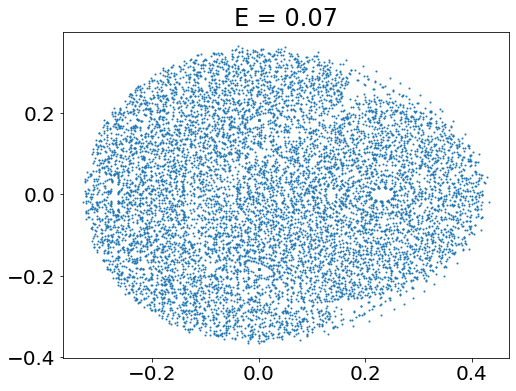

CPU times: user 1min 28s, sys: 116 ms, total: 1min 28s
Wall time: 1min 28s


In [13]:
%%time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

energy = 1.0/15.0
X0_henon = give_ics(energy, -1.5, 0.0, 75)
data = poincare(henon_system, X0_henon, epoch_n=1200, h=0.1, N=1)
data = np.array(np.concatenate(data).ravel())
u2 = data[2::4]
u3 = data[3::4]
plt.title(f"E = {energy:1.2f}")
plt.scatter(u2, u3, s=1)
plt.show()

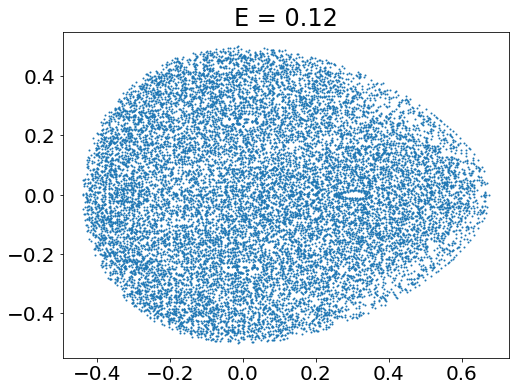

CPU times: user 2min 15s, sys: 31.9 ms, total: 2min 15s
Wall time: 2min 15s


In [14]:
%%time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

energy = 1.0/8.0
X0_henon = give_ics(energy, -1.5, 0.0, 75)
data = poincare(henon_system, X0_henon, epoch_n=1200, h=0.1, N=1)
data = np.array(np.concatenate(data).ravel())
u2 = data[2::4]
u3 = data[3::4]
plt.title(f"E = {energy:1.2f}")
plt.scatter(u2, u3, s=1)
plt.show()